<a href="https://colab.research.google.com/github/alirezash97/Time-frequency-analysis-course/blob/main/TayPaper/Tay2005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import *


In [2]:

def K(x):

   
   
  output = []
  for i in range(int((filter_length-1)/2)):
     
    combination_statement =  math.factorial(filter_length) / (math.factorial(i) * math.factorial(filter_length-i))
    second_statement = np.multiply( np.power(x, i), np.power( (1-x), filter_length-i ))
    final_statement = np.multiply(combination_statement, second_statement)
    output.append(final_statement)
  
  return np.sum(output)

 ######################################


In [3]:

def kl(x, l):


  combination_statement =  math.factorial(filter_length) / (math.factorial(l) * math.factorial(filter_length-l))
  second_statement = np.multiply(np.power(x, l), np.power((1-x), (filter_length-l))) 
  tirth_statement = np.multiply( np.power(x, (filter_length-l)), np.power((1-x), l))
  final_statement = np.multiply(combination_statement, (second_statement - tirth_statement))

  return final_statement

  #####################################


In [48]:
def B(x, alpha_list):


  sigma = []
  for l in range( Vanishing_moments, int((filter_length-1)/2) ):
    sigma.append(np.multiply( kl(x, l), alpha_list[l]))
  final_equation = K(x) - np.sum(sigma)
  
  return final_equation

In [60]:
def main_function():
  
  
  # inputs
  global filter_length 
  global Vanishing_moments
  filter_length = int(input("Please enter filter length: "))
  Vanishing_moments = int(input("Please enter the number of vanishing moments: "))
  while int(((filter_length-1)/2-Vanishing_moments)) %2 != 0:
    Vanishing_moments = int(input("Please enter another number for vanishing moments: "))
  else:
    pass
  
  global number_of_pin
  number_of_pin = int(1/2*((filter_length - 1) /2-Vanishing_moments))
  print("You have to choose %d"%number_of_pin, "pins")
  global zero_pinning
  zero_pinning = []
  for i in range(number_of_pin):
    temp = float(input("Enter %dth pin: " %(i+1)))
    zero_pinning.append(temp)
    #############

  # create symbols
  global alpha_list
  alpha_list = []
  for i in range(1, filter_length+1):
    alpha_list.append(sym.symbols('alpha%d'%i))

  global x_list
  x_list = []
  for i in range(len(zero_pinning)):
    x_list.append(sym.symbols('x%d'%i))
  #############

  # create equations
  global my_equations
  my_equations = []
  for i in range(len(x_list)):

    Eq1 = sym.Eq(B(x_list[i], alpha_list), 0)
    my_equations.append(Eq1)

    Eq2 = sym.Eq(diff(B(x_list[i], alpha_list), x_list[i]))
    my_equations.append(Eq2)
  ##############

  # replace x with zero pinning values
  global replaced_equations
  replaced_equations = []
  for i, equation in enumerate(my_equations):
    replaced = equation.subs(x_list[math.floor(i/2)], zero_pinning[math.floor(i/2)])
    replaced_equations.append(replaced)
  ###############

  # find alphas using equations
  global alpha_results
  alpha_results = solve([i for i in replaced_equations], [j for j in alpha_list[Vanishing_moments : int((filter_length-1)/2)]])
  ###############


  # plot 
  my_array = []
  for key in alpha_results:
    my_array.append(alpha_results[key])
  alpha_values = np.zeros((len(alpha_list)))
  alpha_values[Vanishing_moments : int((filter_length-1)/2)] = my_array
  x = np.linspace(0, 1, num=100)
  fx = []
  for i in range(len(x)):
    fx.append(B(x[i], alpha_values))
  plt.plot(x, fx)


  return alpha_results




Please enter filter length: 11
Please enter the number of vanishing moments: 3
You have to choose 1 pins
Enter 1th pin: 0.8
{alpha4: 0.0294858504814740, alpha5: -0.0778801978958683}


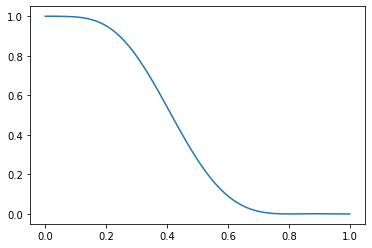

In [50]:
my_alphas = main_function()
print(my_alphas)

Please enter filter length: 11
Please enter the number of vanishing moments: 3
You have to choose 1 pins
Enter 1th pin: 0.75
{alpha4: 0.106916622529918, alpha5: -0.211490805369551}


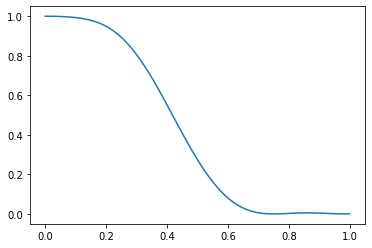

In [51]:
my_alphas = main_function()
print(my_alphas)

Please enter filter length: 15
Please enter the number of vanishing moments: 3
You have to choose 2 pins
Enter 1th pin: 0.6
Enter 2th pin: 0.8
{alpha4: 6.79778005199386, alpha5: -23.4927897490313, alpha6: 36.3658081291036, alpha7: -24.6387814681112}


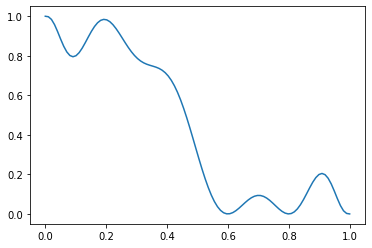

In [53]:
my_alphas = main_function()
print(my_alphas)

Please enter filter length: 12
Please enter the number of vanishing moments: 2
Please enter another number for vanishing moments: 2
Please enter another number for vanishing moments: 3
You have to choose 1 pins
Enter 1th pin: 0.8
{alpha4: 0.0103133396809626, alpha5: -0.0227937281512760}


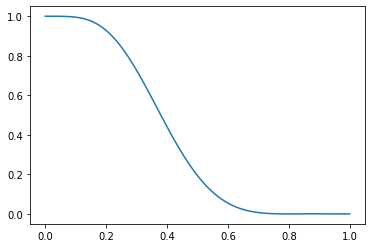

In [61]:
my_alphas = main_function()
print(my_alphas)